### <font color='#00954c'>**Cálculo de las Bandas de Bollinger con pandas**</font>

In [95]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
from IPython.display import display, HTML

cf.set_config_file(sharing='public', theme = 'ggplot', offline=True)

ModuleNotFoundError: No module named 'cufflinks'

In [24]:
#petroleo crudo WTI
wti = 'CL=F'

In [25]:
#informacion de la variable
wti_info = yf.Ticker(wti)

In [26]:
wti_info

yfinance.Ticker object <CL=F>

In [28]:
wti_info.info

{'exchange': 'NYM',
 'shortName': 'Crude Oil Sep 22',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '-14400000',
 'underlyingSymbol': 'CL.NYM',
 'quoteType': 'FUTURE',
 'symbol': 'CL=F',
 'underlyingExchangeSymbol': 'CLU22.NYM',
 'headSymbol': 'CL=F',
 'market': 'us24_market',
 'previousClose': 90.76,
 'regularMarketOpen': 90.69,
 'twoHundredDayAverage': 94.9615,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 90.85,
 'navPrice': None,
 'averageDailyVolume10Day': 333751,
 'totalAssets': None,
 'regularMarketPreviousClose': 90.76,
 'fiftyDayAverage': 105.9886,
 'trailingAnnualDividendRate': None,
 'open': 90.69,
 'toCurrency': None,
 'averageVolume10days': 333751,
 'expireDate': 1661126400,
 'yield': None,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,
 'regula

In [30]:
#verifiquemos el nombre del activo
wti_info.info['shortName']

'Crude Oil Sep 22'

In [31]:
df_wti = yf.download(wti, start='2020-12-01', end='2022-07-08')

[*********************100%***********************]  1 of 1 completed


In [32]:
df_wti

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,45.080002,45.700001,44.119999,44.549999,44.549999,314919
2020-12-02,44.380001,45.919998,43.919998,45.279999,45.279999,368854
2020-12-03,44.990002,45.840000,44.660000,45.639999,45.639999,350768
2020-12-04,45.639999,46.680000,45.610001,46.259998,46.259998,335453
2020-12-07,46.150002,46.540001,45.360001,45.759998,45.759998,348871
...,...,...,...,...,...,...
2022-06-30,109.699997,110.449997,105.099998,105.760002,105.760002,362890
2022-07-01,106.010002,109.339996,104.559998,108.430000,108.430000,305338
2022-07-05,108.800003,111.449997,97.430000,99.500000,99.500000,594215


In [33]:
df_wti.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [34]:
df_wti.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [35]:
df_wti.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,45.080002,45.700001,44.119999,44.549999,44.549999,314919
2020-12-02,44.380001,45.919998,43.919998,45.279999,45.279999,368854
2020-12-03,44.990002,45.840000,44.660000,45.639999,45.639999,350768
2020-12-04,45.639999,46.680000,45.610001,46.259998,46.259998,335453
2020-12-07,46.150002,46.540001,45.360001,45.759998,45.759998,348871


In [36]:
df_wti.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Text(0.5, 1.0, 'Boxplot de WTI')

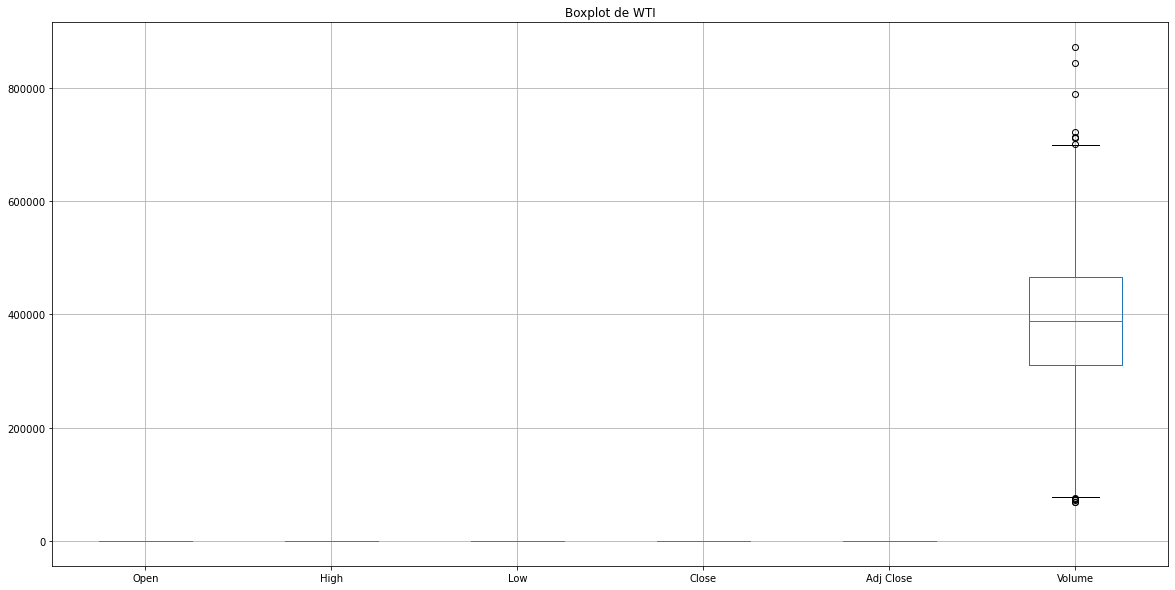

In [40]:
#oflayers
plt.figure(figsize=(20,10))
df_wti.boxplot()
plt.title('Boxplot de WTI')

In [42]:
df_wti.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [43]:
df_wti[['Open', 'High', 'Low', 'Close', 'Adj Close']]

,Open,High,Low,Close,Adj Close
Date,,,,,
2020-12-01,45.080002,45.700001,44.119999,44.549999,44.549999
2020-12-02,44.380001,45.919998,43.919998,45.279999,45.279999
2020-12-03,44.990002,45.840000,44.660000,45.639999,45.639999
2020-12-04,45.639999,46.680000,45.610001,46.259998,46.259998
2020-12-07,46.150002,46.540001,45.360001,45.759998,45.759998
...,...,...,...,...,...
2022-06-30,109.699997,110.449997,105.099998,105.760002,105.760002
2022-07-01,106.010002,109.339996,104.559998,108.430000,108.430000
2022-07-05,108.800003,111.449997,97.430000,99.500000,99.500000


<AxesSubplot:>

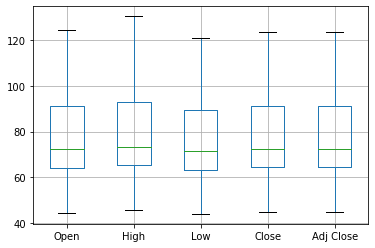

In [44]:
df_wti[['Open', 'High', 'Low', 'Close', 'Adj Close']].boxplot()

Text(0.5, 1.0, 'Histograma de Volume')

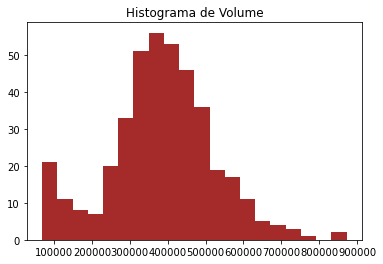

In [51]:
figsize=(40,20)
plt.hist(df_wti['Volume'], color = 'brown', bins = 20)
plt.title('Histograma de Volume')

In [52]:
df_wti.describe()

,Open,High,Low,Close,Adj Close,Volume
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,77.662030,79.214381,76.098738,77.759035,77.759035,384153.326733
std,19.604546,20.329189,18.768066,19.507790,19.507790,140196.765712
min,44.380001,45.700001,43.919998,44.549999,44.549999,68489.000000
25%,64.132504,65.314997,63.037501,64.332502,64.332502,310897.250000
50%,72.484997,73.299999,71.299999,72.500000,72.500000,388592.000000
75%,91.082500,92.840002,89.392502,91.387499,91.387499,466753.000000
max,124.660004,130.500000,120.790001,123.699997,123.699997,872244.000000


In [ ]:
#df_wti.to_csv('df_wti.csv', sep = ';')

# Bandas de Bollinger

In [53]:
#creamos una data vacia
df_bb = pd.DataFrame()

In [54]:
#asignamos close de df_wti a df_bb
df_bb['Close'] = df_wti['Close']

In [55]:
type(df_bb['Close'])

pandas.core.series.Series

In [56]:
df_bb

,Close
Date,
2020-12-01,44.549999
2020-12-02,45.279999
2020-12-03,45.639999
2020-12-04,46.259998
2020-12-07,45.759998
...,...
2022-06-30,105.760002
2022-07-01,108.430000
2022-07-05,99.500000


In [57]:
#media movil con una ventana de 20 dias
j = 20

In [58]:
df_wti['Close'].rolling(j)

Rolling [window=20,center=False,axis=0,method=single]

In [59]:
df_wti['Close'].rolling(j).mean()

Date
2020-12-01        NaN
2020-12-02        NaN
2020-12-03        NaN
2020-12-04        NaN
2020-12-07        NaN
               ...   
2022-06-30    113.963
2022-07-01    113.441
2022-07-05    112.491
2022-07-06    111.447
2022-07-07    110.478
Name: Close, Length: 404, dtype: float64

In [62]:
df_bb['media_movil']= df_wti['Close'].rolling(j).mean()
df_bb

,Close,media_movil
Date,,
2020-12-01,44.549999,NaN
2020-12-02,45.279999,NaN
2020-12-03,45.639999,NaN
2020-12-04,46.259998,NaN
2020-12-07,45.759998,NaN
...,...,...
2022-06-30,105.760002,113.963
2022-07-01,108.430000,113.441
2022-07-05,99.500000,112.491


In [64]:
#desviacion tipica
df_bb['std'] = df_wti['Close'].rolling(j).std()
df_bb

,Close,media_movil,std
Date,,,
2020-12-01,44.549999,NaN,NaN
2020-12-02,45.279999,NaN,NaN
2020-12-03,45.639999,NaN,NaN
2020-12-04,46.259998,NaN,NaN
2020-12-07,45.759998,NaN,NaN
...,...,...,...
2022-06-30,105.760002,113.963,5.975272
2022-07-01,108.430000,113.441,5.980052
2022-07-05,99.500000,112.491,6.610070


In [65]:
#numero de desviaciones
k=2

In [67]:
#creamos la banda de arriba
df_bb['bb_upper'] = df_bb['media_movil'] + k*df_bb['std']

In [68]:
df_bb

,Close,media_movil,std,bb_upper
Date,,,,
2020-12-01,44.549999,NaN,NaN,NaN
2020-12-02,45.279999,NaN,NaN,NaN
2020-12-03,45.639999,NaN,NaN,NaN
2020-12-04,46.259998,NaN,NaN,NaN
2020-12-07,45.759998,NaN,NaN,NaN
...,...,...,...,...
2022-06-30,105.760002,113.963,5.975272,125.913544
2022-07-01,108.430000,113.441,5.980052,125.401104
2022-07-05,99.500000,112.491,6.610070,125.711139


In [69]:
#creamos la banda de abajo
df_bb['bb_lower'] = df_bb['media_movil'] - k*df_bb['std']

In [70]:
df_bb

,Close,media_movil,std,bb_upper,bb_lower
Date,,,,,
2020-12-01,44.549999,NaN,NaN,NaN,NaN
2020-12-02,45.279999,NaN,NaN,NaN,NaN
2020-12-03,45.639999,NaN,NaN,NaN,NaN
2020-12-04,46.259998,NaN,NaN,NaN,NaN
2020-12-07,45.759998,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-06-30,105.760002,113.963,5.975272,125.913544,102.012456
2022-07-01,108.430000,113.441,5.980052,125.401104,101.480896
2022-07-05,99.500000,112.491,6.610070,125.711139,99.270861


<AxesSubplot:xlabel='Date'>

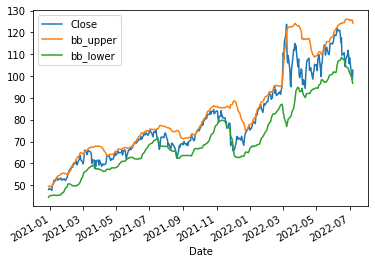

In [96]:
figsize=(20,10)
df_bb[['Close', 'bb_upper', 'bb_lower']].plot()

In [73]:
df_bb.head(21)

,Close,media_movil,std,bb_upper,bb_lower
Date,,,,,
2020-12-01,44.549999,NaN,NaN,NaN,NaN
2020-12-02,45.279999,NaN,NaN,NaN,NaN
2020-12-03,45.639999,NaN,NaN,NaN,NaN
2020-12-04,46.259998,NaN,NaN,NaN,NaN
2020-12-07,45.759998,NaN,NaN,NaN,NaN
2020-12-08,45.599998,NaN,NaN,NaN,NaN
2020-12-09,45.520000,NaN,NaN,NaN,NaN
2020-12-10,46.779999,NaN,NaN,NaN,NaN
2020-12-11,46.570000,NaN,NaN,NaN,NaN


In [74]:
df_bb.isna().sum()

Close           0
media_movil    19
std            19
bb_upper       19
bb_lower       19
dtype: int64

In [76]:
df_bb = df_bb.dropna()

In [77]:
df_bb.head(20)

,Close,media_movil,std,bb_upper,bb_lower
Date,,,,,
2020-12-29,48.000000,46.9290,1.239584,49.408167,44.449832
2020-12-30,48.400002,47.1215,1.146112,49.413723,44.829276
2020-12-31,48.520000,47.2835,1.100183,49.483867,45.083133
2021-01-04,47.619999,47.3825,1.031447,49.445394,45.319605
2021-01-05,49.930000,47.5660,1.141792,49.849584,45.282416
2021-01-06,50.630001,47.8095,1.250488,50.310477,45.308523
2021-01-07,50.830002,48.0710,1.309572,50.690144,45.451856
2021-01-08,52.240002,48.4070,1.472550,51.352100,45.461901
2021-01-11,52.250000,48.6805,1.651556,51.983613,45.377388


<AxesSubplot:xlabel='Date'>

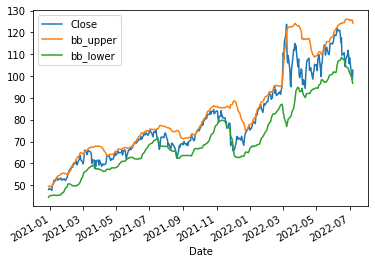

In [84]:
df_bb[['Close', 'bb_upper', 'bb_lower']].plot()

In [97]:
df_bb.iplot(kind='line')

AttributeError: 'DataFrame' object has no attribute 'iplot'